In [ ]:
# !pip install librosa

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Play an audio file

In [ ]:
file_path = r"insert file path here"
Audio(file_path)

# Load audio using librosa

In [ ]:
y, sr = librosa.load(file_path)
print(f'Sample rate: {sr} Hz')
duration = librosa.get_duration(y=y, sr=sr)
print(f'Duration: {duration} seconds')
if len(y.shape) == 1:
    ch = 1
elif len(y.shape) == 2:
    ch = 2
print(f'Num. channels (1 = mono, 2 = stereo): {ch}')

# Display

## Waveform

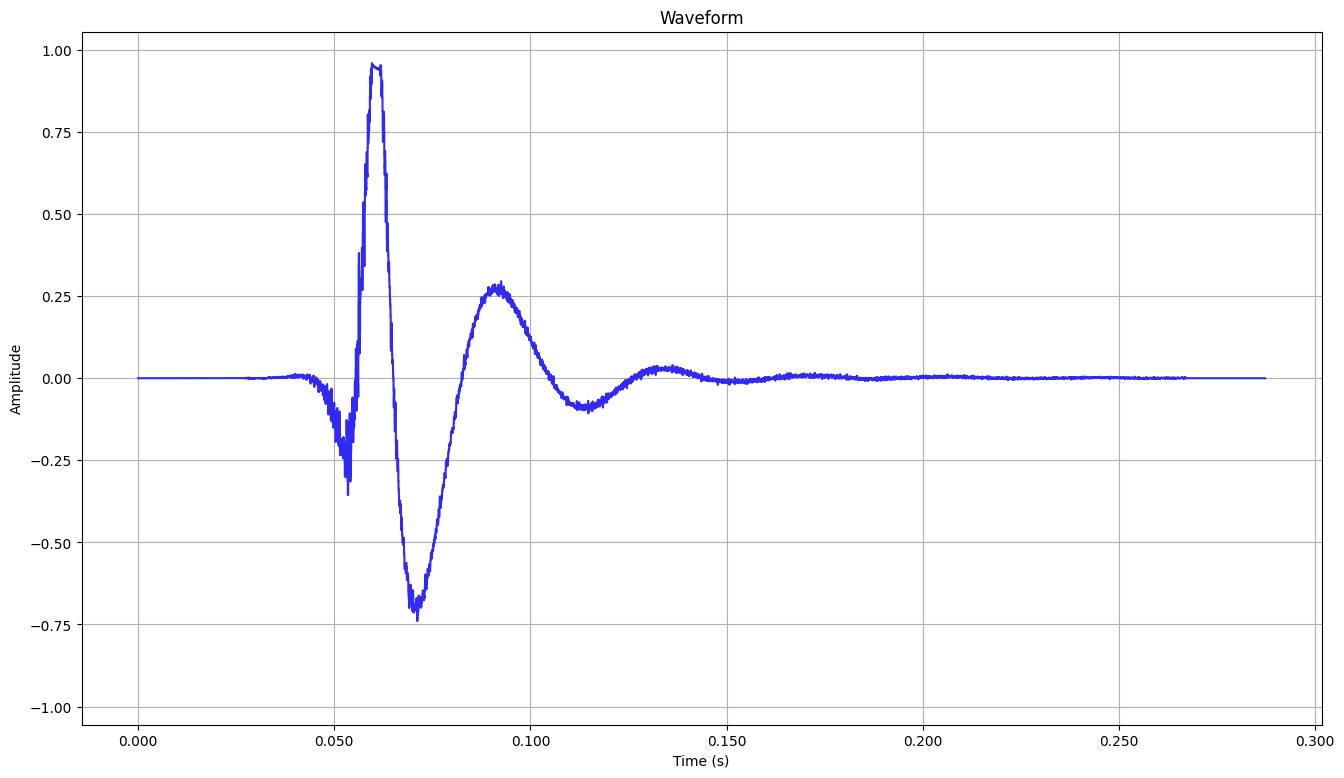

In [6]:
y, sr = librosa.load(file_path)

plt.figure(figsize=(16, 9))
librosa.display.waveshow(y, sr=sr, color='#312af7')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Spectogram

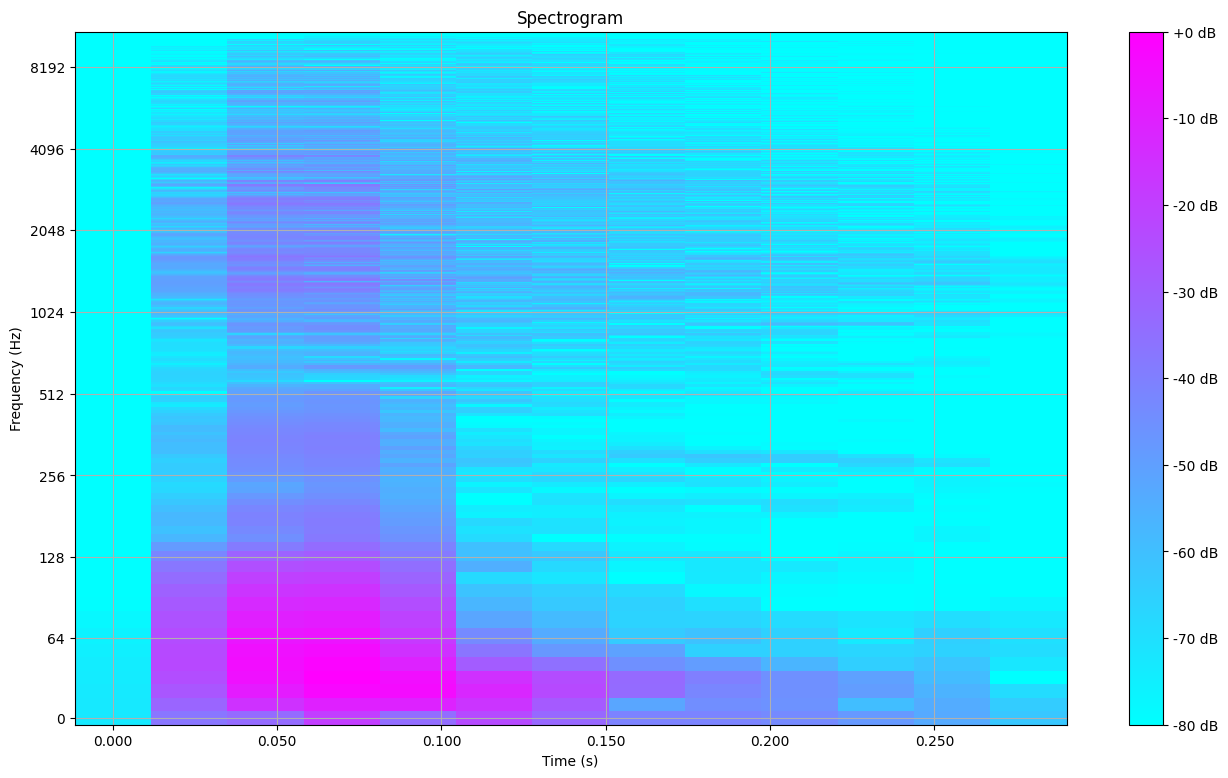

In [7]:
y, sr = librosa.load(file_path)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(16, 9))
img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(img, format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.show()


## Mel Spectrogram

A Mel spectrogram is a type of spectrogram where the frequencies are converted to the Mel scale. The Mel scale is a perceptual scale of pitches judged by listeners to be equal in distance from one another. 

In the context of audio signal processing, a Mel spectrogram is a representation of the short-term power spectrum of a sound. It is based on a linear cosine transform of a log power spectrum on a nonlinear Mel scale of frequency. 

The Mel spectrogram is computed by applying a frequency-domain filter bank to audio signals that are windowed in time. This results in a 2D representation where the rows correspond to the Mel frequency bands and the columns correspond to different time frames in the audio signal. The value at each point in the array represents the intensity of a particular Mel frequency in a particular time frame.

This kind of representation is particularly useful in many audio processing tasks, including speech recognition and music information retrieval, because it closely approximates the human auditory system's response to different frequencies.

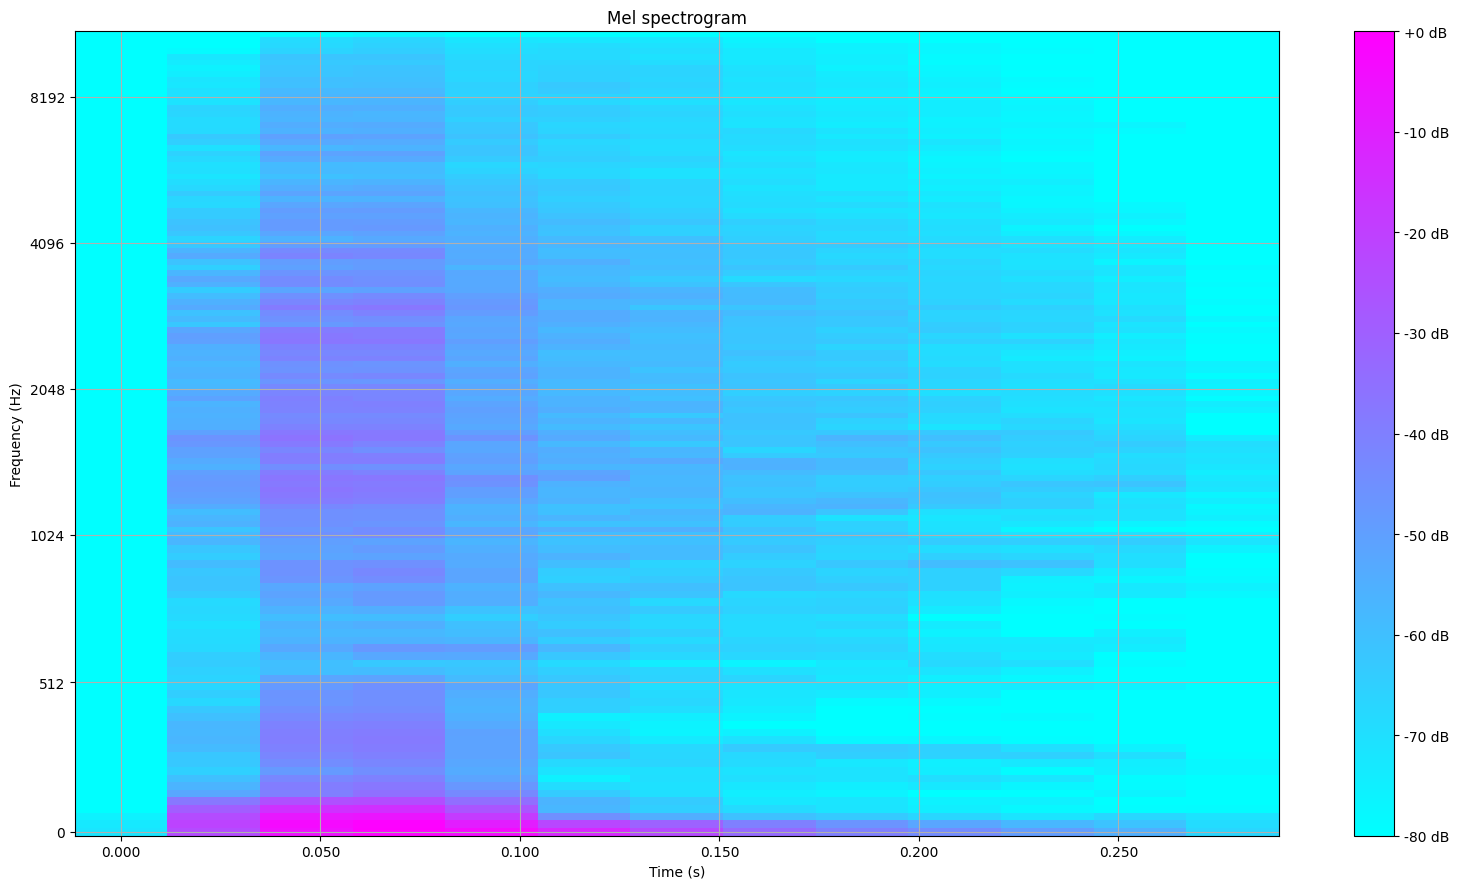

In [8]:
y, sr = librosa.load(file_path)
n_mels=128

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_S = librosa.power_to_db(S, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(16, 9))
img = librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', cmap='cool')
plt.title('Mel spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(img, format='%+02.0f dB')
plt.grid(True)
plt.tight_layout()
plt.show()